# NumPy Examples

In this lecture, we provide more examples of NumPy. The materials are adapted from [Pythia](https://foundations.projectpythia.org/core/numpy).

## Example 1: Dealing with Missing Values

Let's start from something simple:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

This calculates the total of all values in the array:

In [3]:
np.sum(a)

66

In [4]:
a.sum()

66

Now, with a reminder about how our array is shaped,

In [5]:
a.shape

(3, 4)

we can specify `axis` to get _just_ the sum across each of our rows.

In [6]:
np.sum(a, axis=0)

array([12, 15, 18, 21])

Or do the same and take the sum across columns:

In [7]:
np.sum(a, axis=1)

array([ 6, 22, 38])

Most real-world datasets – environmental or otherwise – have data gaps. Data can be missing for any number of reasons, including observations not being recorded or data corruption. While a cell corresponding to a data gap may just be left blank in a spreadsheet, when imported into Python, there need be some way to handle "blank" or missing values.

Missing data should not be replaced with zeros, as 0 can be a valid value for many datasets (e.g. temperature, precipitation, etc.). Instead, the convention is to fill all missing data with the constant NaN. NaN stands for "Not a Number" and is implemented in NumPy as np.nan.

NaNs are handled differently by different packages. In NumPy, all computations involving NaN values will return nan:

In [10]:
a = np.array([[0., np.nan, 2, 3],
                 [4, 5, 6, 7],
                 [8, 9, 10, 11]])
a

array([[ 0., nan,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [11]:
np.sum(a)

nan

In [12]:
np.nansum(a)

65.0

## Example 2: Indexing arrays with boolean values

### Array comparisons
NumPy can easily create arrays of boolean values and use those to select certain values to extract from an array

In [2]:
# Create some synthetic data representing temperature and wind speed data
np.random.seed(19990503)  # Make sure we all have the same data
temp = 20 * np.cos(np.linspace(0, 2 * np.pi, 100)) + 50 + 2 * np.random.randn(100)
speed = np.abs(
    10 * np.sin(np.linspace(0, 2 * np.pi, 100)) + 10 + 5 * np.random.randn(100)
)

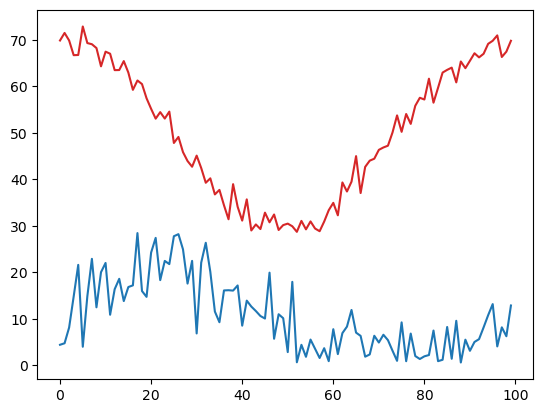

In [3]:
plt.plot(temp, 'tab:red')
plt.plot(speed, 'tab:blue')

By doing a comparison between a NumPy array and a value, we get an
array of values representing the results of the comparison between
each element and the value

In [4]:
temp > 45

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

This, which is its own NumPy array of `boolean` values, can be used as an index to another array of the same size. We can even use it as an index within the original `temp` array we used to compare,

In [5]:
temp[temp > 45]

array([69.89825854, 71.52313905, 69.90028363, 66.73828667, 66.77980233,
       72.91468564, 69.34603239, 69.09533591, 68.27350814, 64.33916721,
       67.49497791, 67.05282372, 63.51829518, 63.54034678, 65.46576463,
       62.99683836, 59.27662304, 61.29361272, 60.51641586, 57.46048995,
       55.19793004, 53.07572989, 54.47998158, 53.09552107, 54.59037269,
       47.84272747, 49.1435589 , 45.87151534, 45.11976794, 45.009292  ,
       46.36021141, 46.87557425, 47.25668992, 50.09599544, 53.77789358,
       50.24073197, 54.07629059, 51.95065202, 55.84827794, 57.56967086,
       57.19572063, 61.67658285, 56.51474577, 59.72166924, 62.99403256,
       63.57569453, 64.05984232, 60.88258643, 65.37759899, 63.94115754,
       65.53070256, 67.15175649, 66.26468701, 67.03811793, 69.17773618,
       69.83571708, 70.99586742, 66.34971928, 67.49905207, 69.83593609])

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    This only returns the values from our original array meeting the indexing conditions, nothing more! Note the size,
</div>

In [6]:
temp[temp > 45].shape

(60,)

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Indexing arrays with arrays requires them to be the same size!
</div>

If we store this array somewhere new,

In [7]:
temp_45 = temp[temp > 45]

In [11]:
temp_45[temp < 45]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 100

We find that our original `(100,)` shape array is too large to subset our new `(60,)` array.

If their sizes _do_ match, the boolean array can come from a totally different array!

In [12]:
speed > 10

array([False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True])

In [15]:
temp[speed > 10]

array([66.73828667, 66.77980233, 69.34603239, 69.09533591, 68.27350814,
       64.33916721, 67.49497791, 67.05282372, 63.51829518, 63.54034678,
       65.46576463, 62.99683836, 59.27662304, 61.29361272, 60.51641586,
       57.46048995, 55.19793004, 53.07572989, 54.47998158, 53.09552107,
       54.59037269, 47.84272747, 49.1435589 , 45.87151534, 43.95971516,
       42.72814762, 42.45316175, 39.2797517 , 40.23351938, 36.77179678,
       34.43329229, 31.42277612, 38.97505745, 34.10549575, 35.70826448,
       29.01276068, 30.31180935, 29.31602671, 32.84580454, 30.76695309,
       29.11344716, 30.16652571, 29.91513049, 39.51784389, 69.17773618,
       69.83571708, 69.83593609])

### Replacing values
To extend this, we can use this conditional indexing to _assign_ new values to certain positions within our array, somewhat like a masking operation.

In [16]:
# Make a copy so we don't modify the original data
temp2 = temp.copy()
speed2 = speed.copy()

# Replace all places where speed is <10 with NaN (not a number)
temp2[speed < 10] = np.nan
speed2[speed < 10] = np.nan

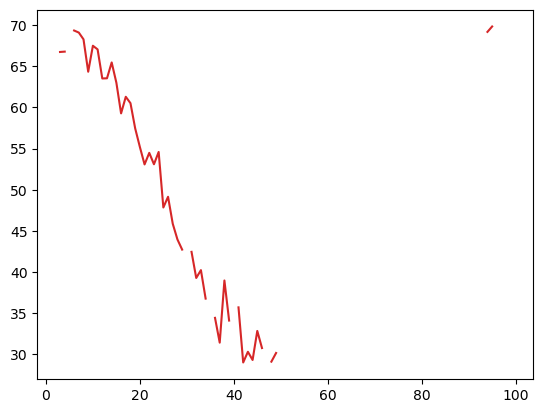

In [17]:
plt.plot(temp2, 'tab:red')

and to put this in context,

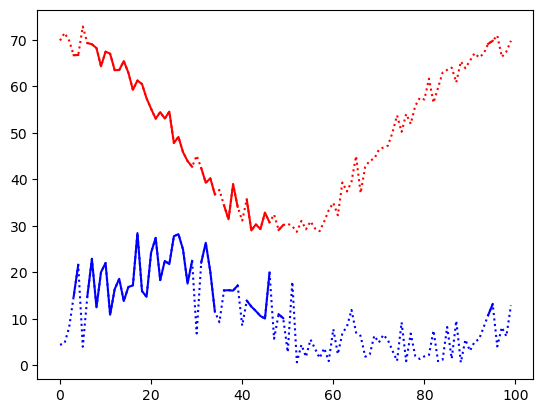

In [18]:
plt.plot(temp, 'r:')
plt.plot(temp2, 'r')
plt.plot(speed, 'b:')
plt.plot(speed2, 'b')

If we use parentheses to preserve the order of operations, we can combine these conditions with other bitwise operators like the `&` for `bitwise_and`,

In [19]:
multi_mask = (temp < 45) & (speed > 10)
multi_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [20]:
temp[multi_mask]

array([43.95971516, 42.72814762, 42.45316175, 39.2797517 , 40.23351938,
       36.77179678, 34.43329229, 31.42277612, 38.97505745, 34.10549575,
       35.70826448, 29.01276068, 30.31180935, 29.31602671, 32.84580454,
       30.76695309, 29.11344716, 30.16652571, 29.91513049, 39.51784389])

Heat index is only defined for temperatures >= 80F and relative humidity values >= 40%. Using the data generated below, we can use boolean indexing to extract the data where heat index has a valid value.

In [19]:
# Here's the "data"
np.random.seed(19990503)
temp = 20 * np.cos(np.linspace(0, 2 * np.pi, 100)) + 80 + 2 * np.random.randn(100)
relative_humidity = np.abs(
    20 * np.cos(np.linspace(0, 4 * np.pi, 100)) + 50 + 5 * np.random.randn(100)
)

# Create a mask for the two conditions described above
good_heat_index = (temp >= 80) & (relative_humidity >= 40)

# Use this mask to grab the temperature and relative humidity values that together
# will give good heat index values
print(temp[good_heat_index])

[ 99.89825854 101.52313905  99.90028363  96.73828667  96.77980233
 102.91468564  99.34603239  99.09533591  98.27350814  94.33916721
  97.49497791  97.05282372  93.51829518  93.54034678  95.46576463
  92.99683836  91.29361272  86.51474577  89.72166924  92.99403256
  93.57569453  94.05984232  90.88258643  95.37759899  93.94115754
  95.53070256  97.15175649  96.26468701  97.03811793  99.17773618
  99.83571708 100.99586742  96.34971928  97.49905207  99.83593609]


Another bitwise operator we can find helpful is Python's `~` complement operator, which can give us the **inverse** of our specific mask to let us assign `np.nan` to every value _not_ satisfied in `good_heat_index`.

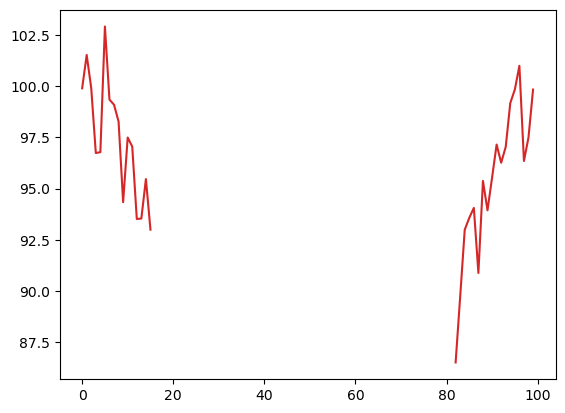

In [20]:
plot_temp = temp.copy()
plot_temp[~good_heat_index] = np.nan
plt.plot(plot_temp, 'tab:red')

## Example 3: Extending to higher dimensions using broadcasting

Consider the following arrays `x`, `y`, and `z`, which are all different dimensions. We can use newaxis and broadcasting to perform $x^2 + y^2 + z^2$:

In [21]:
x = np.array([1, 2])
y = np.array([3, 4, 5])
z = np.array([6, 7, 8, 9])

In [29]:
x.shape, y.shape

((2,), (3,))

First, we extend the `x` array using newaxis, and then square it.  Then, we square `y`, and broadcast it onto the extended `x` array:

In [26]:
d_2d = x[:, np.newaxis] ** 2 + y**2

In [27]:
d_2d.shape

(2, 3)

Finally, we further extend this new 2-D array to a 3-D array using newaxis, square the `z` array, and then broadcast `z` onto the newly extended array:

In [28]:
d_3d = d_2d[..., np.newaxis] + z**2

In [32]:
d_3d.shape

(2, 3, 4)

As described above, we can also perform these operations in a single line of code, like this:

In [37]:
h = x[:, np.newaxis, np.newaxis] ** 2 + y[np.newaxis, :, np.newaxis] ** 2 + z**2

We can use the shape method to see the shape of the array created by the single line of code above.  As you can see, it matches the shape of the array created by the multi-line process above:

In [38]:
h.shape

(2, 3, 4)

We can also use the all method to confirm that both arrays contain the same data:

In [39]:
np.all(h == d_3d)

True

Broadcasting is often useful when you want to do calculations with coordinate values, which are often given as 1-D arrays corresponding to positions along a particular array dimension. For example, we can use broadcasting to help with taking range and azimuth values for radar data (1-D separable polar coordinates) and converting to x,y pairs relative to the radar location.

Given the 3-D temperature field and 1-D pressure coordinates below, let's calculate $T \times \exp(P / 1000)$, which is known as [potential temperature](https://en.wikipedia.org/wiki/Potential_temperature). We will need to use broadcasting to make the arrays compatible.  The following code demonstrates how to use newaxis and broadcasting to perform this calculation:

In [30]:
pressure = np.array([1000, 850, 500, 300])
temps = np.linspace(20, 30, 24).reshape(4, 3, 2)
pressure.shape, temps.shape

((4,), (4, 3, 2))

In [41]:
pressure[:, np.newaxis, np.newaxis].shape

(4, 1, 1)

In [46]:
theta = temps * np.exp(pressure[:, np.newaxis, np.newaxis] / 1000)

In [47]:
theta.shape

(4, 3, 2)

## Example 4: Calculating Derivatives


Let's use NumPy on another practical example, which is to calculate temperature advection. If you're not familiar with this (don't worry!), we'll be looking to calculate

\begin{equation*}
\text{advection} = -\vec{v} \cdot \nabla T
\end{equation*}

and to do so we'll start with some random $T$ and $\vec{v}$ values,

In [34]:
temp = np.random.randn(100, 50)
u = np.random.randn(100, 50)
v = np.random.randn(100, 50)

We can calculate the `np.gradient` of our new $T(100\times50)$ field as two separate component gradients,

In [35]:
gradient_x, gradient_y = np.gradient(temp)

In [36]:
(gradient_x.shape, gradient_y.shape)

((100, 50), (100, 50))

`np.gradient` returns the gradient of an N-dimensional array. Since no spacing is specified in this example, default unitary spacing is used for all dimensions.

In order to calculate $-\vec{v} \cdot \nabla T$, we will use `np.dstack` to turn our two separate component gradient fields into one multidimensional field containing $x$ and $y$ gradients at each of our $100\times50$ points,

In [37]:
grad_vectors = np.dstack([gradient_x, gradient_y])
print(grad_vectors.shape)

(100, 50, 2)


and then do the same for our separate $u$ and $v$ wind components,

In [39]:
wind_vectors = np.dstack([u, v])
print(wind_vectors.shape)

(100, 50, 2)


Finally, we can calculate the dot product of these two multidimensional fields of wind and temperature gradient components by hand as an element-wise multiplication, `*`, and then a `sum` of our separate components at each point (i.e., along the last `axis`),

In [40]:
advection = (wind_vectors * -grad_vectors).sum(axis=-1)
print(advection.shape)

(100, 50)
